# Bioinformatician Machine Learning Technical Interview
Kavya Banerjee

In [1]:
!conda create -n ml_assesssment python=3.8
!conda activate ml_assesssment
!pip install jupyterlab pandas numpy scipy scikit-learn matplotlib seaborn umap-learn

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/libmambapy/bindings.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.19.dylib
  Referenced from: <4F399D22-A23C-3D44-9152-8ED3D55C3724> /Users/kavyabanerjee/opt/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Users/kavyabanerjee/opt/anaconda3/lib/libarchive.19.dylib' (no such file), '/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/kavyabanerjee/opt/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/Users/kavyabanerjee/opt/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/usr/local/lib/libarchive.19.dylib' (no such file), '/usr/lib/libarchive.19.dylib' (no such file, not in dyld cache))

CondaValueError: You have ch


You have a set of 209,040 enhancer candidate cis-regulatory elements (cCREs) that are annotated with H3K27ac signal across 66 mouse samples. H3K27ac is a histone mark associated with enhancer activity.

Datasets

Mouse matrix: http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt
 - Matrix of H3K27ac signal at 209,040 distal enhancers across 66 mouse developmental timepoints
 - Each column name has tissue and time point corresponding to one experiment

Tasks:
1. Run UMAP to cluster mouse experiments using H3K27ac signal at mouse enhancers
- Be cognizant of normalizing data:
    - Should take log of signal + small pseudocount
    - Should normalize data (such as standard scale in scikit) within experiment

Try testing different parameters such as perplexity to obtain the best figure,


Create scatterplots of results with:
  - Color points by tissue
  - Shape point by timepoint

  
Write a brief summary (~ 1 paragraph) of your results.


In [2]:
# uncomment to download the data - change as per your path
!wget -P /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt

--2024-11-04 10:45:30--  http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt
Resolving users.wenglab.org (users.wenglab.org)... 146.189.25.27
Connecting to users.wenglab.org (users.wenglab.org)|146.189.25.27|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt [following]
--2024-11-04 10:45:30--  https://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt
Connecting to users.wenglab.org (users.wenglab.org)|146.189.25.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118592609 (113M) [text/plain]
Saving to: ‘/Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data/Mouse-Enhancer-Matrix.txt’

Mouse-Enhancer-Matr 100%[===================>] 113.10M  36.8MB/s    in 3.1s    

2024-11-04 10:45:33 (36.8 MB/s) - ‘/Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data/Mouse-Enhance

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
cwd = os.getcwd()
file_name = '/data/Mouse-Enhancer-Matrix.txt'
df = pd.read_csv(cwd+file_name, sep='\t')
df.head()

,ccres,C57BL/6_embryonic_facial_prominence_embryo_11.5_days,C57BL/6_embryonic_facial_prominence_embryo_12.5_days,C57BL/6_embryonic_facial_prominence_embryo_13.5_days,C57BL/6_embryonic_facial_prominence_embryo_14.5_days,C57BL/6_embryonic_facial_prominence_embryo_15.5_days,C57BL/6_forebrain_embryo_11.5_days,C57BL/6_forebrain_embryo_12.5_days,C57BL/6_forebrain_embryo_13.5_days,C57BL/6_forebrain_embryo_14.5_days,...,C57BL/6_midbrain_postnatal_0_days,C57BL/6_neural_tube_embryo_11.5_days,C57BL/6_neural_tube_embryo_12.5_days,C57BL/6_neural_tube_embryo_13.5_days,C57BL/6_neural_tube_embryo_14.5_days,C57BL/6_neural_tube_embryo_15.5_days,C57BL/6_stomach_embryo_14.5_days,C57BL/6_stomach_embryo_15.5_days,C57BL/6_stomach_embryo_16.5_days,C57BL/6_stomach_postnatal_0_days
0,EM10D0024807,0.737987,0.496333,0.394944,0.608239,0.519169,0.476346,0.469204,0.728918,0.526971,...,0.651397,0.531423,0.782652,0.606512,0.465679,0.559411,0.489681,0.728980,1.047850,1.142360
1,EM10D0062280,0.737908,0.756066,0.619545,0.840945,0.786815,1.235750,1.365740,1.077090,0.811603,...,0.935929,1.176740,1.049060,0.934667,1.252420,1.090870,0.949902,0.745198,0.767133,0.862137
2,EM10D0073850,0.366271,0.901060,0.695672,0.345374,0.596921,1.018470,1.055840,0.776323,0.829389,...,0.645772,0.855515,0.890337,0.610279,0.783446,0.673417,0.752583,0.868450,0.685157,0.370126
3,EM10D0135775,0.531865,0.987585,0.451908,0.425011,0.790187,0.462021,0.838769,0.646874,0.505505,...,0.386949,0.759358,0.795779,0.583168,0.539668,0.575424,0.840946,0.597951,0.750593,1.036590
4,EM10D0156272,1.275800,1.399650,1.563410,1.546810,1.135640,1.296100,1.475620,1.383600,1.491620,...,1.653730,1.861350,0.979202,1.484450,1.591600,1.638390,1.287630,1.074740,1.104080,1.201430


In [5]:
# setting the index first
df.set_index('ccres', inplace=True)

# confirm the dimensions of df - should be 209,040 x 66
dim = df.shape
print(f"Dimension of matrix: {dim}")

Dimension of matrix: (209040, 66)


In [6]:
df.columns

Index(['C57BL/6_embryonic_facial_prominence_embryo_11.5_days',
       'C57BL/6_embryonic_facial_prominence_embryo_12.5_days',
       'C57BL/6_embryonic_facial_prominence_embryo_13.5_days',
       'C57BL/6_embryonic_facial_prominence_embryo_14.5_days',
       'C57BL/6_embryonic_facial_prominence_embryo_15.5_days',
       'C57BL/6_forebrain_embryo_11.5_days',
       'C57BL/6_forebrain_embryo_12.5_days',
       'C57BL/6_forebrain_embryo_13.5_days',
       'C57BL/6_forebrain_embryo_14.5_days',
       'C57BL/6_forebrain_embryo_15.5_days',
       'C57BL/6_forebrain_embryo_16.5_days',
       'C57BL/6_forebrain_postnatal_0_days', 'C57BL/6_heart_embryo_11.5_days',
       'C57BL/6_heart_embryo_12.5_days', 'C57BL/6_heart_embryo_13.5_days',
       'C57BL/6_heart_embryo_14.5_days', 'C57BL/6_heart_embryo_15.5_days',
       'C57BL/6_heart_embryo_16.5_days', 'C57BL/6_heart_postnatal_0_days',
       'C57BL/6_hindbrain_embryo_11.5_days',
       'C57BL/6_hindbrain_embryo_12.5_days',
       'C57BL/6_hindb

In [7]:
meta_df =  pd.DataFrame({'tissue_time': df.columns}) #
meta_df[['tissue', "time", 'units']] = meta_df['tissue_time'].str.rsplit('_', n=2, expand=True) # split at second last delimiter for and units days
meta_df["time"] = meta_df['time'] + "_" + meta_df['units']
meta_df["tissue"] = meta_df["tissue"].str.replace("C57BL/6_", "", regex=False)
meta_df = meta_df.set_index('tissue_time').drop('units', axis=1)
meta_df.head()

,tissue,time
tissue_time,,
C57BL/6_embryonic_facial_prominence_embryo_11.5_days,embryonic_facial_prominence_embryo,11.5_days
C57BL/6_embryonic_facial_prominence_embryo_12.5_days,embryonic_facial_prominence_embryo,12.5_days
C57BL/6_embryonic_facial_prominence_embryo_13.5_days,embryonic_facial_prominence_embryo,13.5_days
C57BL/6_embryonic_facial_prominence_embryo_14.5_days,embryonic_facial_prominence_embryo,14.5_days
C57BL/6_embryonic_facial_prominence_embryo_15.5_days,embryonic_facial_prominence_embryo,15.5_days


In [8]:
# checking for missing values in both data and labels
missing_values_data = df.isnull().sum().sum()
missing_values_labels = meta_df.isnull().sum().sum()
print(f"\nMissing values in data: {missing_values_data}")
print(f"Missing values in labels: {missing_values_labels}")


Missing values in data: 0
Missing values in labels: 0


In [9]:
zero_read_ccres = df.index[(df == 0).all(axis=1)] # check if ccres have any signal
zero_read_ccres

# drop the ccres
df = df.drop(index=zero_read_ccres)
print(f"Dimension of matrix: {df.shape}")

Dimension of matrix: (209039, 66)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# log normalize with pseudocount
df_log = np.log(df + 1e-5)
df_log.head()

scaler = StandardScaler()
# scale the data within each sample
df_normalized = scaler.fit_transform(df_log)
# convert to dataframe again
df_normalized = pd.DataFrame(df_normalized, columns=df_log.columns, index=df_log.index)
df_normalized.head()

,C57BL/6_embryonic_facial_prominence_embryo_11.5_days,C57BL/6_embryonic_facial_prominence_embryo_12.5_days,C57BL/6_embryonic_facial_prominence_embryo_13.5_days,C57BL/6_embryonic_facial_prominence_embryo_14.5_days,C57BL/6_embryonic_facial_prominence_embryo_15.5_days,C57BL/6_forebrain_embryo_11.5_days,C57BL/6_forebrain_embryo_12.5_days,C57BL/6_forebrain_embryo_13.5_days,C57BL/6_forebrain_embryo_14.5_days,C57BL/6_forebrain_embryo_15.5_days,...,C57BL/6_midbrain_postnatal_0_days,C57BL/6_neural_tube_embryo_11.5_days,C57BL/6_neural_tube_embryo_12.5_days,C57BL/6_neural_tube_embryo_13.5_days,C57BL/6_neural_tube_embryo_14.5_days,C57BL/6_neural_tube_embryo_15.5_days,C57BL/6_stomach_embryo_14.5_days,C57BL/6_stomach_embryo_15.5_days,C57BL/6_stomach_embryo_16.5_days,C57BL/6_stomach_postnatal_0_days
ccres,,,,,,,,,,,,,,,,,,,,,
EM10D0024807,-0.539643,-1.505580,-1.648523,-0.838730,-1.409932,-1.215430,-1.482893,-0.665070,-0.989181,-1.570197,...,-0.750648,-1.076560,-0.695829,-0.908421,-1.351203,-1.183643,-1.315640,-0.836509,-0.171968,-0.083475
EM10D0062280,-0.539821,-0.765105,-0.988175,-0.410031,-0.723694,0.302710,0.182745,-0.122713,-0.405393,-0.245965,...,-0.214240,0.199461,0.043036,-0.337209,0.206934,-0.098350,-0.286901,-0.799336,-0.583654,-0.505593
EM10D0073850,-1.704702,-0.456439,-0.818200,-1.587641,-1.179590,-0.005249,-0.218476,-0.577551,-0.376090,-1.318686,...,-0.763484,-0.312268,-0.370707,-0.900243,-0.531917,-0.882226,-0.648414,-0.540754,-0.732853,-1.773825
EM10D0135775,-1.084357,-0.295123,-1.450915,-1.313074,-0.716635,-1.264056,-0.577287,-0.830934,-1.045398,-0.851532,...,-1.521502,-0.503652,-0.653879,-0.960263,-1.118969,-1.137779,-0.476053,-1.171245,-0.612430,-0.229202
EM10D0156272,0.370726,0.318390,0.369430,0.396432,-0.118008,0.378645,0.303383,0.225138,0.417314,0.430554,...,0.628293,0.935522,-0.130764,0.273822,0.584388,0.562630,0.185392,-0.180698,-0.102958,-0.007857


In [11]:
# sanity check for normalise
means = df_normalized.mean()
std_devs = df_normalized.std()

print("Means:\n", means) # should be close to 0
print("\nStandard Deviations\n:", std_devs) # should be close to 1 # passed

Means:
 C57BL/6_embryonic_facial_prominence_embryo_11.5_days    2.175419e-18
C57BL/6_embryonic_facial_prominence_embryo_12.5_days   -3.480670e-17
C57BL/6_embryonic_facial_prominence_embryo_13.5_days   -5.656089e-17
C57BL/6_embryonic_facial_prominence_embryo_14.5_days   -1.957877e-17
C57BL/6_embryonic_facial_prominence_embryo_15.5_days   -8.049049e-17
                                                            ...     
C57BL/6_neural_tube_embryo_15.5_days                    3.263128e-17
C57BL/6_stomach_embryo_14.5_days                        8.701675e-18
C57BL/6_stomach_embryo_15.5_days                        1.218234e-16
C57BL/6_stomach_embryo_16.5_days                        7.613965e-18
C57BL/6_stomach_postnatal_0_days                        2.175419e-17
Length: 66, dtype: float64

Standard Deviations
: C57BL/6_embryonic_facial_prominence_embryo_11.5_days    1.000002
C57BL/6_embryonic_facial_prominence_embryo_12.5_days    1.000002
C57BL/6_embryonic_facial_prominence_embryo_13.5_days 

In [12]:
labels_df = meta_df.copy()
labels_df.index = df.columns
labels_df.head()

# sanity check
print("Labels index matches df columns:", df_normalized.columns.equals(labels_df.index))

Labels index matches df columns: True


In [13]:
# transpose to have experiments (samples) as rows and enhancers as columns - for clustering
df_normalized_transp = df_normalized.T

In [14]:
labels_df.index = df_normalized_transp.index
print("Labels index matches df_normalized_transp index:", df_normalized_transp.index.equals(labels_df.index))
labels_df.head()

Labels index matches df_normalized_transp index: True


,tissue,time
C57BL/6_embryonic_facial_prominence_embryo_11.5_days,embryonic_facial_prominence_embryo,11.5_days
C57BL/6_embryonic_facial_prominence_embryo_12.5_days,embryonic_facial_prominence_embryo,12.5_days
C57BL/6_embryonic_facial_prominence_embryo_13.5_days,embryonic_facial_prominence_embryo,13.5_days
C57BL/6_embryonic_facial_prominence_embryo_14.5_days,embryonic_facial_prominence_embryo,14.5_days
C57BL/6_embryonic_facial_prominence_embryo_15.5_days,embryonic_facial_prominence_embryo,15.5_days


Running UMAP with n_neighbors=5, min_dist=0.1


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


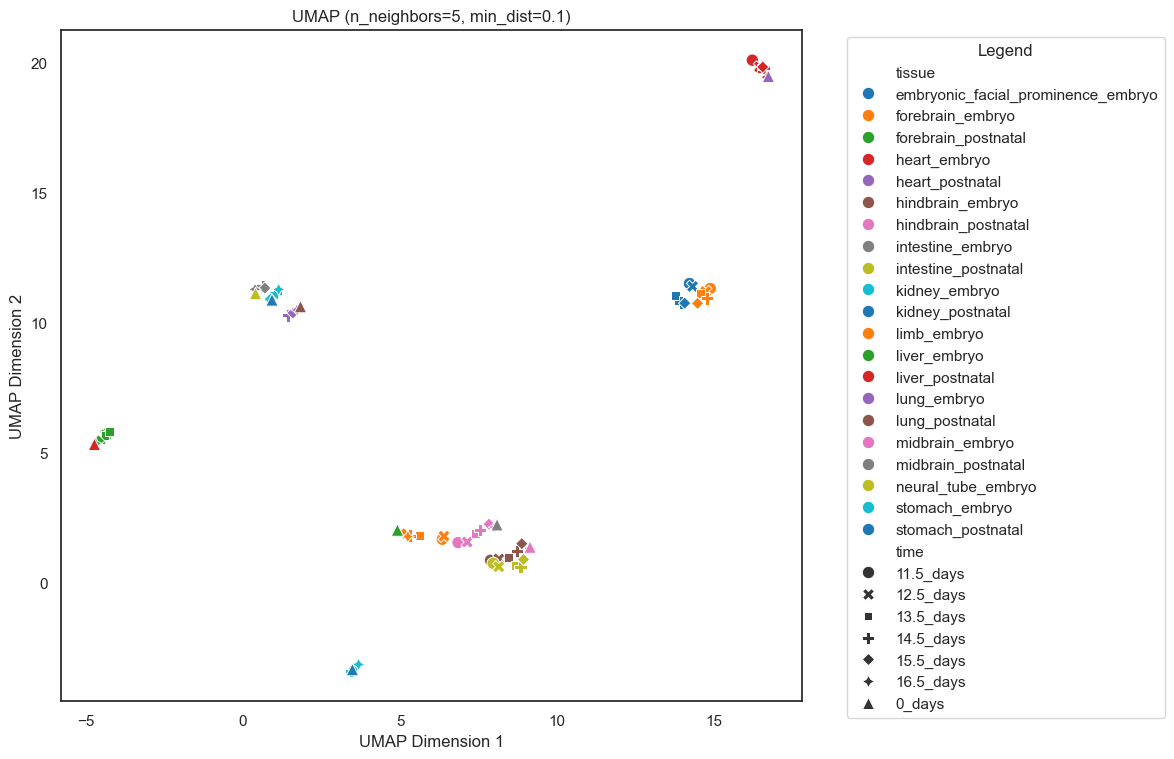

Running UMAP with n_neighbors=5, min_dist=0.5


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


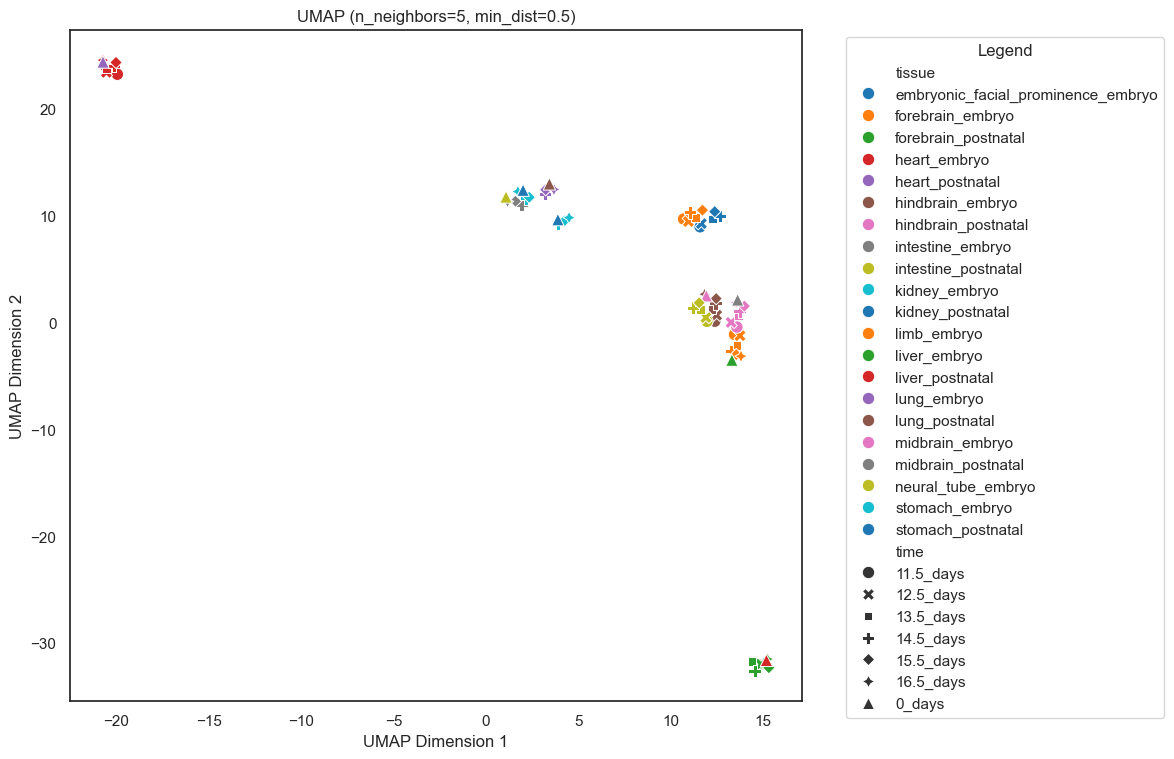

Running UMAP with n_neighbors=5, min_dist=1.0


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


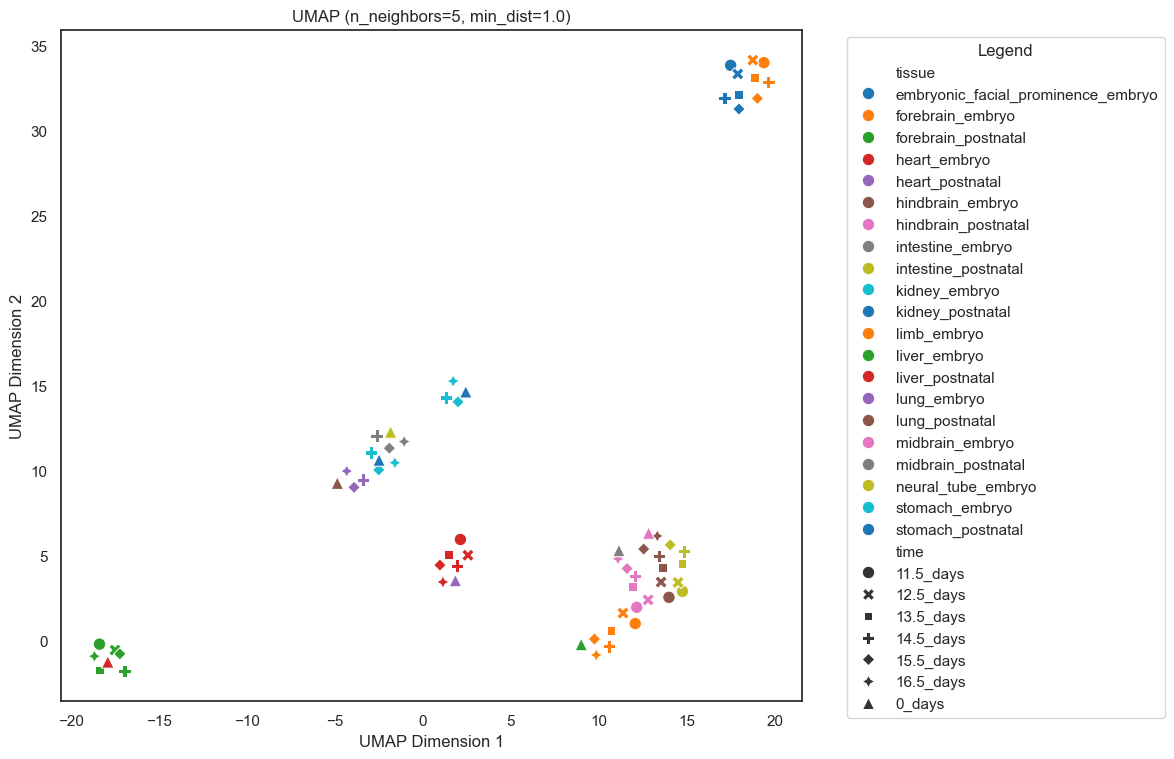

Running UMAP with n_neighbors=15, min_dist=0.1


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


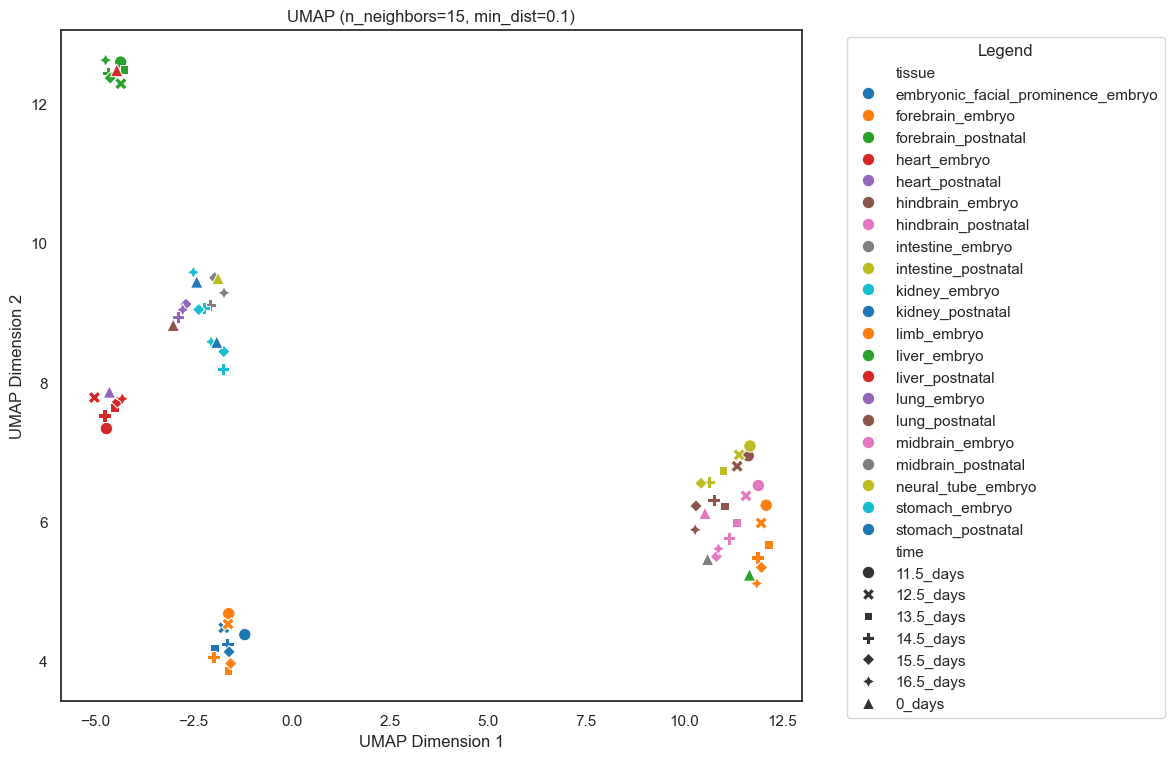

Running UMAP with n_neighbors=15, min_dist=0.5


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


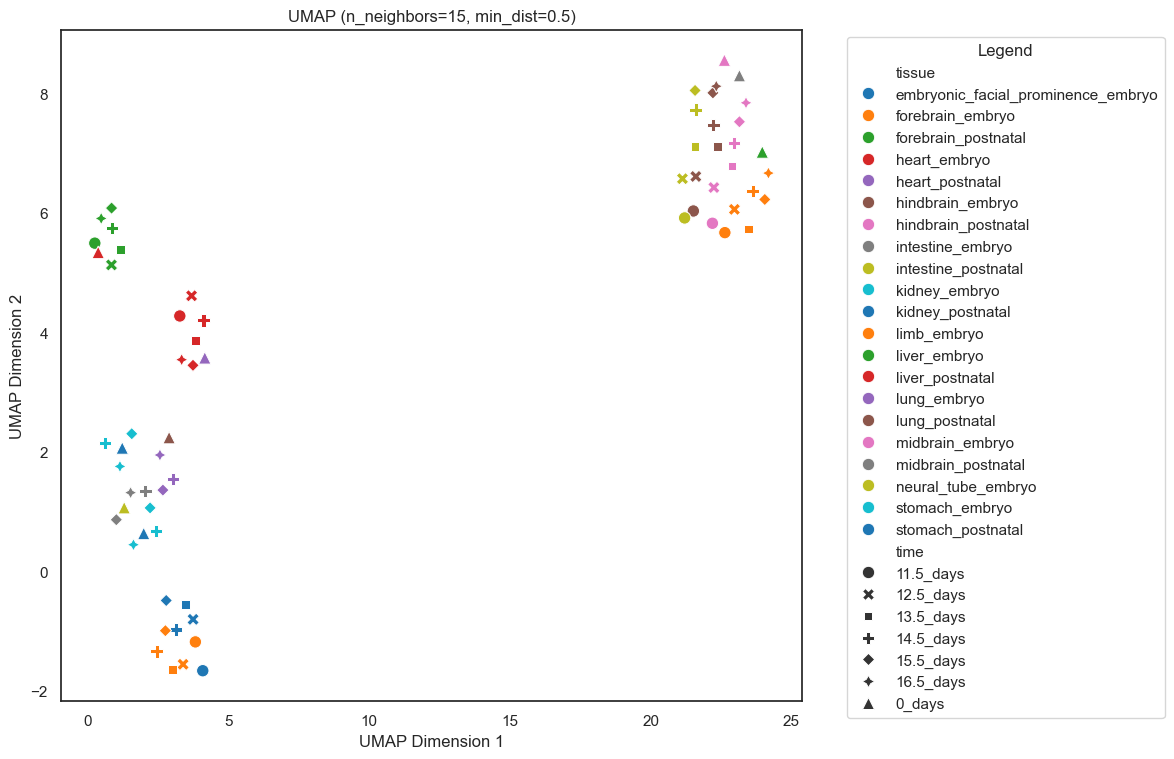

Running UMAP with n_neighbors=15, min_dist=1.0


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


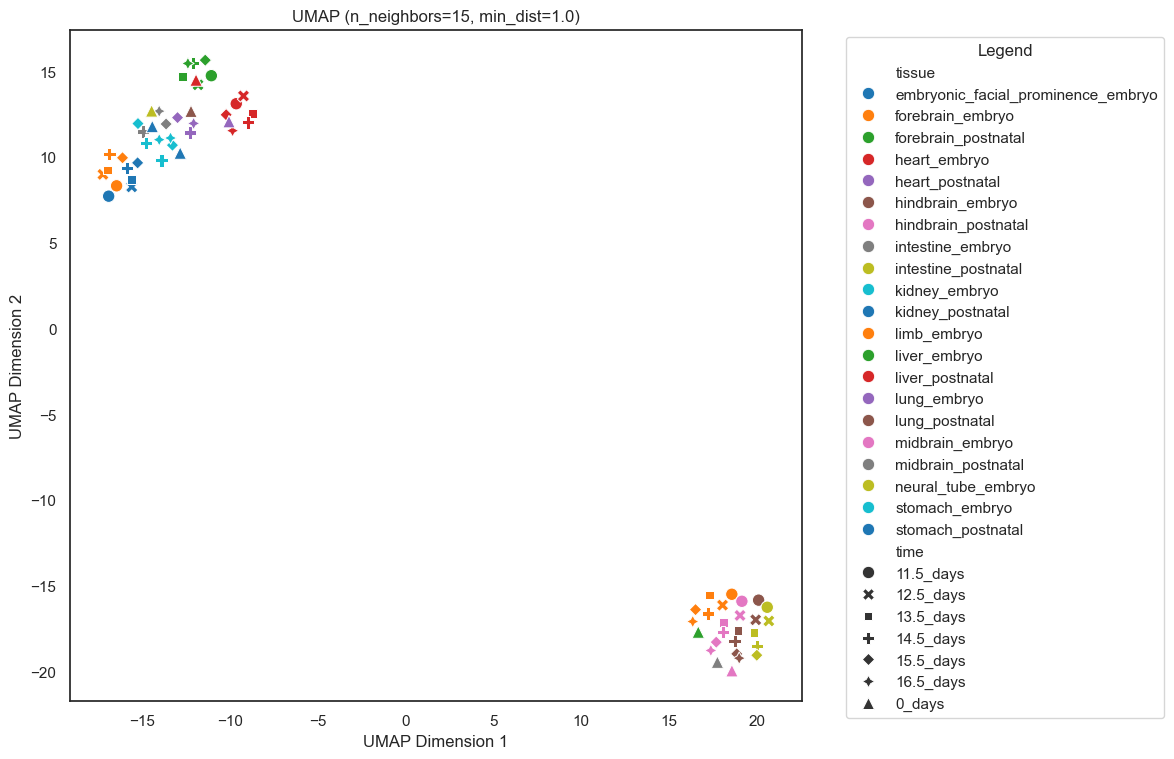

Running UMAP with n_neighbors=30, min_dist=0.1


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


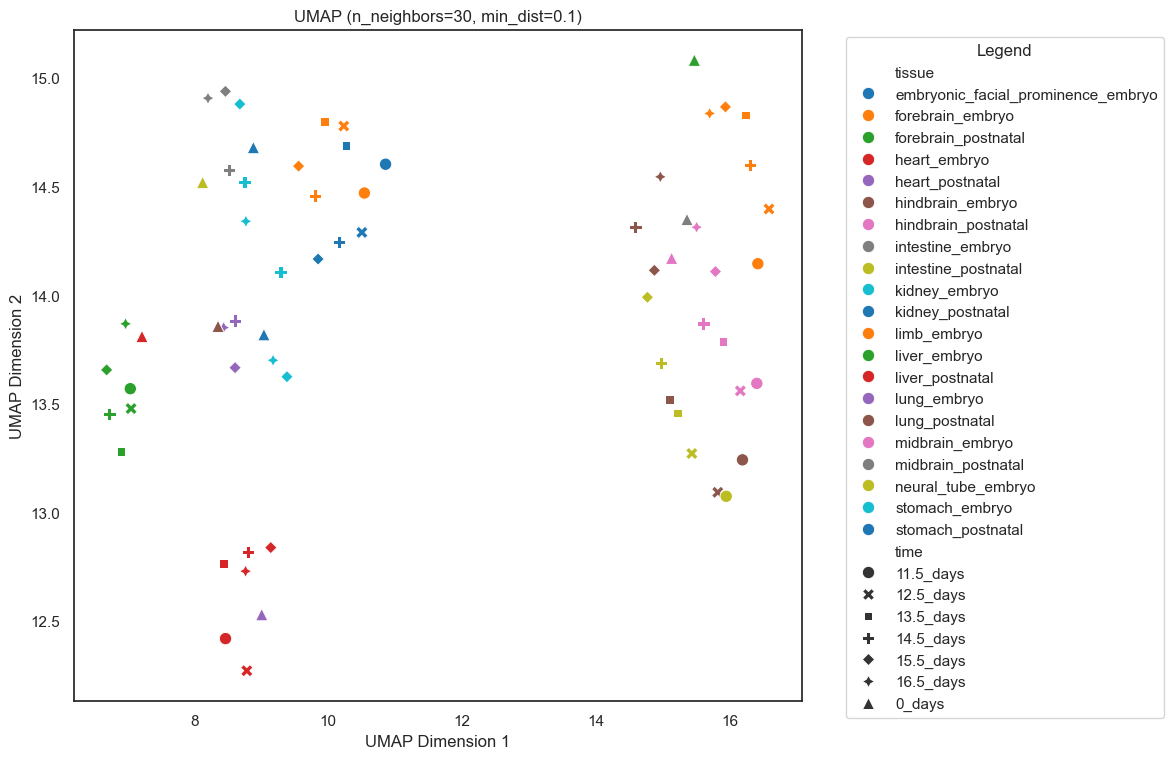

Running UMAP with n_neighbors=30, min_dist=0.5


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


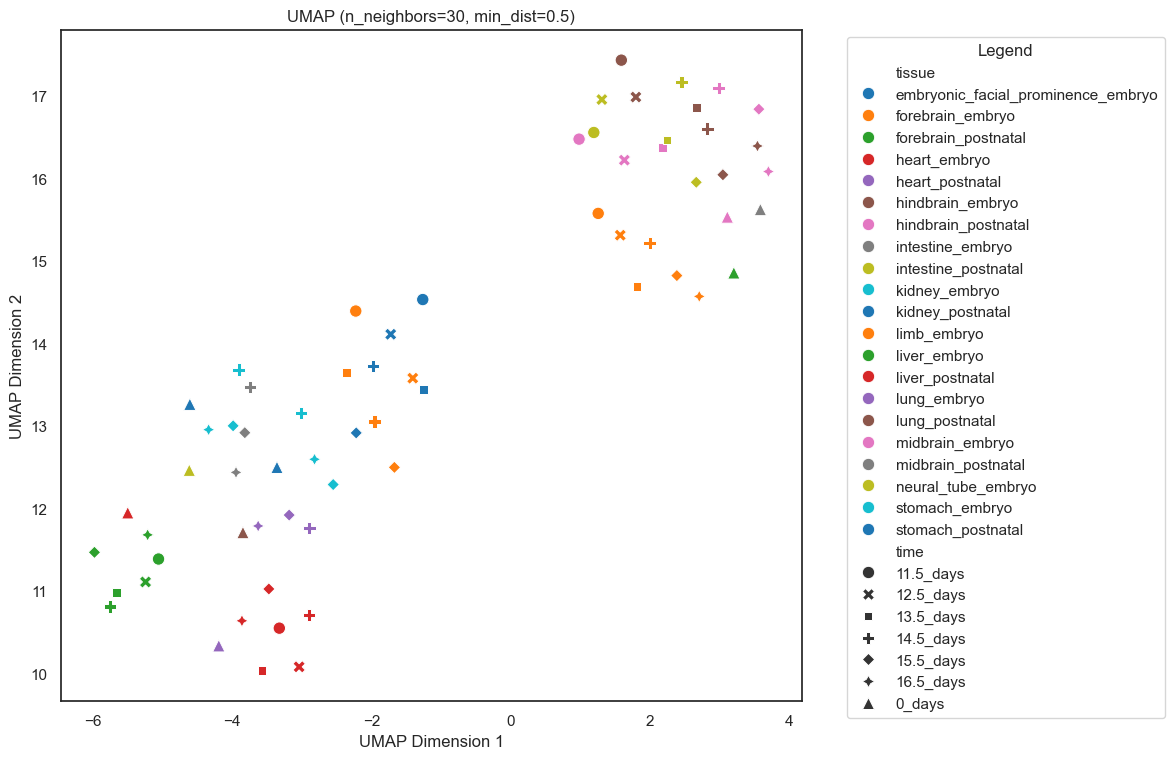

Running UMAP with n_neighbors=30, min_dist=1.0


/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


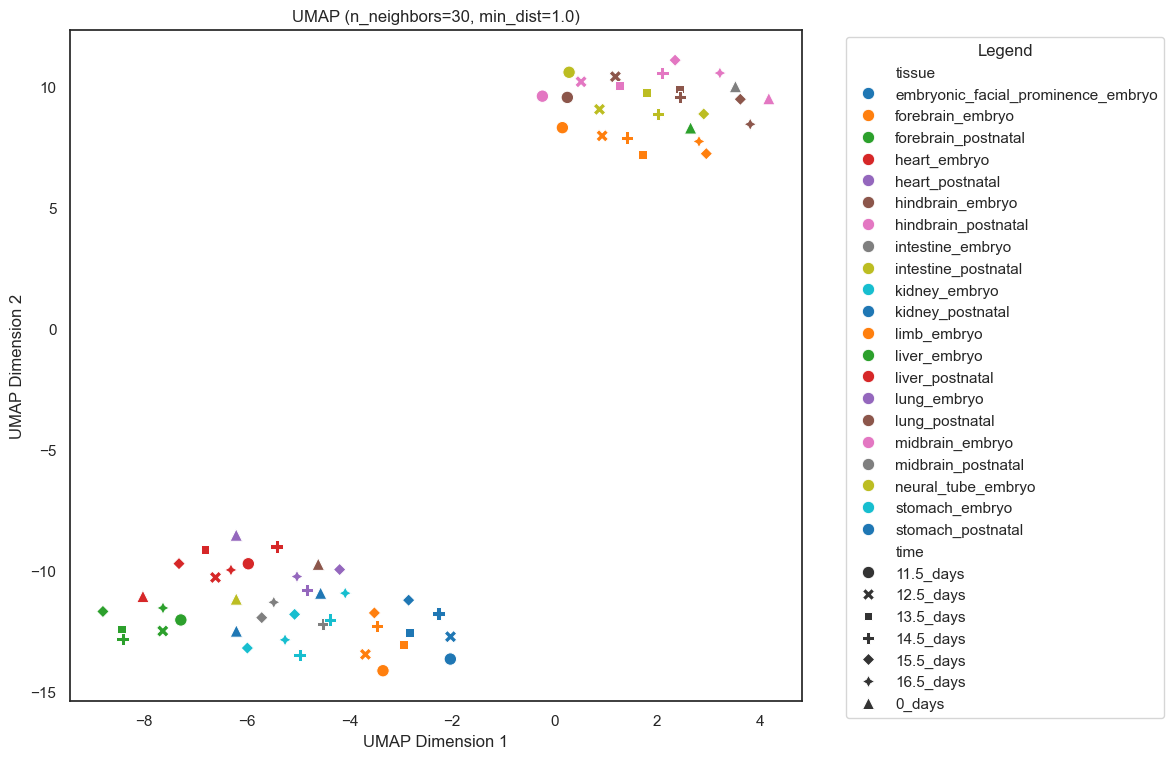

CPU times: user 34.5 s, sys: 4.64 s, total: 39.2 s
Wall time: 49.3 s


In [15]:
%%time
import umap.umap_ as umap

def create_umap_plot(embedding, labels, n_neighbors, min_dist):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=labels['tissue'],
        style=labels['time'],
        s=80,
        palette='tab10',
        legend='full'
    )
    plt.title(f'UMAP (n_neighbors={n_neighbors}, min_dist={min_dist})')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
    plt.tight_layout()
    plt.show()

n_neighbors_list = [5, 15, 30]
min_dist_list = [0.1, 0.5, 1.0]

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        print(f"Running UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}")

        umap_reducer = umap.UMAP(n_neighbors=n_neighbors,
                                 min_dist=min_dist,
                                 metric='euclidean',
                                 random_state=30)

        umap_embedding = umap_reducer.fit_transform(df_normalized_transp)

        create_umap_plot(umap_embedding, labels_df, n_neighbors, min_dist)

In [16]:
# creating the best figure
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1,  random_state=30)
umap_embedding = umap_reducer.fit_transform(df_normalized_transp)

umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'], index=df_normalized_transp.index)
umap_df = pd.concat([umap_df, labels_df[['tissue', 'time']]], axis=1)

umap_df.head()

/Users/kavyabanerjee/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2,tissue,time
C57BL/6_embryonic_facial_prominence_embryo_11.5_days,-1.194929,4.380841,embryonic_facial_prominence_embryo,11.5_days
C57BL/6_embryonic_facial_prominence_embryo_12.5_days,-1.730979,4.478679,embryonic_facial_prominence_embryo,12.5_days
C57BL/6_embryonic_facial_prominence_embryo_13.5_days,-1.971105,4.189186,embryonic_facial_prominence_embryo,13.5_days
C57BL/6_embryonic_facial_prominence_embryo_14.5_days,-1.638290,4.243776,embryonic_facial_prominence_embryo,14.5_days
C57BL/6_embryonic_facial_prominence_embryo_15.5_days,-1.595660,4.133832,embryonic_facial_prominence_embryo,15.5_days


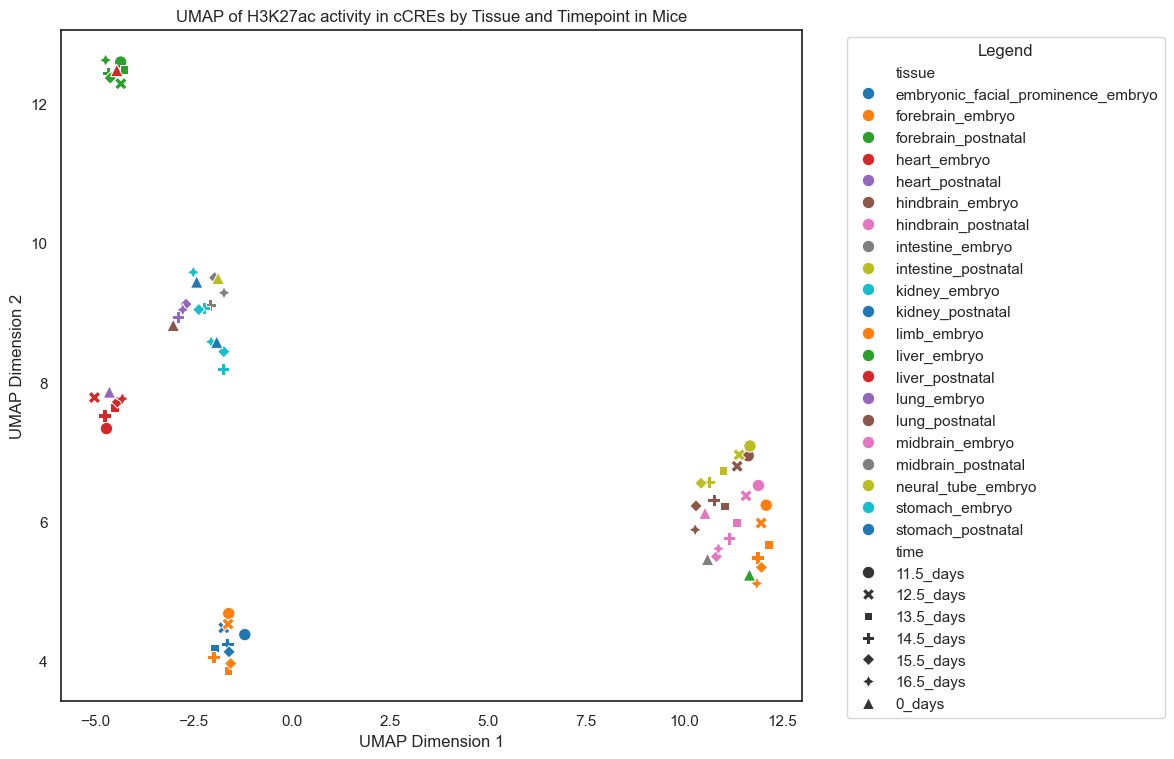

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
        x=umap_df['UMAP1'],
        y=umap_df['UMAP2'],
        hue=umap_df['tissue'],
        style=umap_df['time'],
        s=80,
        palette='tab10',
        legend='full'
    )
plt.title(f'UMAP of H3K27ac activity in cCREs by Tissue and Timepoint in Mice')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
plt.tight_layout()
plt.show()

Takeaways
-  H3K27ac activity across candidate cis-regulatory elements (cCREs) in mouse tissues shows clustering patterns , capturing both tissue-specific patterns and developmental stages. Embryonic and postnatal samples tend to cluster separately, distinct enhancer activity as tissues develop.

- Can see that different tissues, like the forebrain, midbrain, liver and kidney, each form their own clusters, reflecting unique regulatory landscapes.
Within each tissue-specific cluster, there is a progression aligns with developmental timepoints. This trend suggests that as tissues develop, their enhancer activity profiles shift. However, UMAP's non-linear nature may exaggerate distances, so further validation with complementary methods is needed.

- Interestingly, there's some overlap between related tissues or nearby time points, which might suggest shared enhancer activity during transitional stages.

# Task #2: Predicting CTCF binding

CTCF is a transcription factor (TF) that is involved in many cellular processes. It has been shown to bind at promoters, enhancers, and insulators as well as mediate 3D chromatin interactions. Therefore we are interested in characterizing its binding sites and binding partners (i.e., TFs that it binds with).

Your task is to build a linear regression model to (i) predict CTCF signal at candidate cis-regulatory elements (cCREs) using other TF signals and to (ii) determine which TFs that are predictive of CTCF binding (i.e., the most important features)

Datasets

We have a matrix containing transcription factor (TF) ChIP-seq signal for 127 TFs at 10,407 cCREs on chromosome 1.
Col 1: cCRE ID
Col 2: CTCF signal (what you are trying to predict)
Col 3 - 128: signals of 126 other TFs

Chromosome 1 matrix (for model training): Chrom 1 Matrix
Chromosome 2 matrix (for validation): Chrom 2 Matrix

Validate the model using data from chromosome 2.
What is the mean square error for a model trained on the chromosome 1 data but evaluated on the chromosome 2 data?


In [18]:
# uncomment to download the data  - change as per your path
!wget -P /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data "https://www.dropbox.com/s/xy6brz5zv0l36nk/TF-Matrix.chr1.txt?dl=0" -O tf_matrix_chr1.txt
!wget -P /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data "https://www.dropbox.com/s/v8pdwyyzrfrr4pv/TF-Matrix.chr2.txt?dl=0" -O tf_matrix_chr2.txt
!cp /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/tf_matrix_chr1.txt /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data/tf_matrix_chr1.txt
!rm /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/tf_matrix_chr1.txt
!cp /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/tf_matrix_chr2.txt /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/data/tf_matrix_chr2.txt
!rm /Users/kavyabanerjee/Desktop/bioinformatician_umass_assessment_kavya_banerjee/tf_matrix_chr2.txt

--2024-11-04 10:47:54--  https://www.dropbox.com/s/xy6brz5zv0l36nk/TF-Matrix.chr1.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601c:18::a27d:612, 162.125.6.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601c:18::a27d:612|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/hk1a6kyuecgnl91gvku44/TF-Matrix.chr1.txt?rlkey=1k5l9k7nvvuuj3i57n2kvmbkr&dl=0 [following]
--2024-11-04 10:47:54--  https://www.dropbox.com/scl/fi/hk1a6kyuecgnl91gvku44/TF-Matrix.chr1.txt?rlkey=1k5l9k7nvvuuj3i57n2kvmbkr&dl=0
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ae495e340a2a57194d3438284.dl.dropboxusercontent.com/cd/0/inline/CdyIgRsyDbodd5Vhjx_kog1TEA8zPhNspYfsajUe3pqmjMb7Sytuf2U84MAMJ_JijpQVdAbIZ24_lfRijox9RqsMXN_Ryc3C1TFMxyBLu1IptMqPqX-XYpiqiIidWKwi4oUk2qJrvgP0IrJ_k2tIOb9k/file# [following]
--2024-11-04 10:47:55--  https://uc7ae495e340a2a5719

In [19]:
file_path = cwd+'/data/'
tf_matrix_chr1_raw_df = pd.read_csv(file_path+"tf_matrix_chr1.txt", sep='\t') # training
tf_matrix_chr2_raw_df = pd.read_csv(file_path+"tf_matrix_chr2.txt", sep='\t') # validation
tf_matrix_chr1_raw_df.head()

,cCRE,CTCF,ASH2L,ATF2,ATF7,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,...,ZNF143,ZNF207,ZNF217,ZNF24,ZNF384,ZNF592,ZNF687,ZSCAN29,ZZZ3,Unnamed: 128
0,EH38E0078724,1.14190,0.966854,2.188890,0.691002,6.795400,2.392920,1.625600,3.23174,1.45784,...,0.637517,0.972212,0.867020,0.830651,1.014650,1.541170,3.601490,0.846217,0.266719,NaN
1,EH38E1070274,0.60882,1.138660,0.915075,1.700300,0.223262,2.708510,0.144813,0.78011,1.25539,...,0.421721,1.406400,0.676739,0.946100,0.756368,0.684674,1.092570,1.008030,0.232510,NaN
2,EH38E1073973,4.95521,1.282230,3.220930,6.072330,2.783780,3.060970,3.536940,1.62246,1.47039,...,8.425570,2.239830,1.143220,3.676670,1.515720,1.158590,1.108030,0.869008,0.592706,NaN
3,EH38E1310242,24.25520,0.384366,1.621320,1.064170,0.000000,0.998662,0.261641,1.82777,1.82395,...,5.332220,1.069310,1.462700,1.392500,3.341560,1.736810,0.991999,0.743735,0.238827,NaN
4,EH38E1310413,44.44790,1.522690,2.197080,1.031420,1.892720,0.925301,0.407060,1.90325,7.83313,...,7.185560,0.986074,1.299610,1.206740,18.810900,1.468370,0.896588,0.827896,0.151877,NaN


In [20]:
print(f"Dimension of training matrix: {tf_matrix_chr1_raw_df.shape}") # should be 127 TFs 10,407 cCREs - other 2 columns are cCRE index and the CTCF signal - passed

Dimension of training matrix: (10407, 129)


In [21]:
tf_matrix_chr1_raw_df.columns

Index(['cCRE', 'CTCF', 'ASH2L', 'ATF2', 'ATF7', 'BATF', 'BCL11A', 'BCL3',
       'BCLAF1', 'BHLHE40',
       ...
       'ZNF143', 'ZNF207', 'ZNF217', 'ZNF24', 'ZNF384', 'ZNF592', 'ZNF687',
       'ZSCAN29', 'ZZZ3', 'Unnamed: 128'],
      dtype='object', length=129)

In [22]:
tf_matrix_chr1_df = tf_matrix_chr1_raw_df.set_index('cCRE').drop('Unnamed: 128', axis=1)
tf_matrix_chr1_df.head()

,CTCF,ASH2L,ATF2,ATF7,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,BMI1,...,ZEB1,ZNF143,ZNF207,ZNF217,ZNF24,ZNF384,ZNF592,ZNF687,ZSCAN29,ZZZ3
cCRE,,,,,,,,,,,,,,,,,,,,,
EH38E0078724,1.14190,0.966854,2.188890,0.691002,6.795400,2.392920,1.625600,3.23174,1.45784,0.850763,...,1.053490,0.637517,0.972212,0.867020,0.830651,1.014650,1.541170,3.601490,0.846217,0.266719
EH38E1070274,0.60882,1.138660,0.915075,1.700300,0.223262,2.708510,0.144813,0.78011,1.25539,1.030480,...,2.298820,0.421721,1.406400,0.676739,0.946100,0.756368,0.684674,1.092570,1.008030,0.232510
EH38E1073973,4.95521,1.282230,3.220930,6.072330,2.783780,3.060970,3.536940,1.62246,1.47039,1.199130,...,0.357709,8.425570,2.239830,1.143220,3.676670,1.515720,1.158590,1.108030,0.869008,0.592706
EH38E1310242,24.25520,0.384366,1.621320,1.064170,0.000000,0.998662,0.261641,1.82777,1.82395,0.644718,...,0.957643,5.332220,1.069310,1.462700,1.392500,3.341560,1.736810,0.991999,0.743735,0.238827
EH38E1310413,44.44790,1.522690,2.197080,1.031420,1.892720,0.925301,0.407060,1.90325,7.83313,0.827573,...,0.895724,7.185560,0.986074,1.299610,1.206740,18.810900,1.468370,0.896588,0.827896,0.151877


In [23]:
tf_matrix_chr2_df = tf_matrix_chr2_raw_df.set_index('cCRE')
tf_matrix_chr2_df.head()

,CTCF,ASH2L,ATF2,ATF7,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,BMI1,...,ZEB1,ZNF143,ZNF207,ZNF217,ZNF24,ZNF384,ZNF592,ZNF687,ZSCAN29,ZZZ3
cCRE,,,,,,,,,,,,,,,,,,,,,
EH38E0027215,26.5515,0.664611,3.37907,1.865350,2.342520,1.360480,1.515180,3.24784,1.633230,0.813704,...,1.819790,2.43871,1.648240,0.653822,0.825046,3.237520,0.785953,0.696753,0.593301,0.364181
EH38E1326835,19.6054,0.600382,1.73177,2.605770,1.197670,1.134600,0.400490,1.84476,1.174950,1.257250,...,0.702905,2.29511,1.859390,1.163270,0.988682,1.317200,1.017590,1.365580,1.009690,0.181077
EH38E1327139,30.5241,0.786072,2.39205,0.897490,0.784373,0.411152,0.523638,2.33513,1.709140,0.874040,...,0.989349,6.73965,1.066750,1.303800,1.697450,1.258620,1.214380,1.445570,1.467360,0.850621
EH38E1327300,21.3138,1.244450,2.86446,2.726010,2.631160,1.386970,0.606328,2.94974,4.520240,1.846680,...,0.000000,10.52990,1.684560,1.403550,1.309280,3.289710,2.233690,0.876585,1.193760,0.416315
EH38E1327306,28.9173,0.708394,1.37012,0.923346,1.875230,0.695671,0.644188,1.03264,0.582483,0.619789,...,0.082080,4.02934,0.847331,0.595162,0.237928,0.517568,1.255070,0.311165,0.484083,0.493973


In [24]:
print(f"Dimension of validation matrix: {tf_matrix_chr2_df.shape}")

Dimension of validation matrix: (7240, 127)


Tasks:
- First determine which TFs are most predictive for CTCF binding.
  - Build a linear regression model using the chromosome 1 data that models CTCF signal (y) as a linear combination of the 126 TF signals (x's).

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# split the labels and tfs
X_chr1 = tf_matrix_chr1_df.drop('CTCF', axis=1)
y_chr1 = tf_matrix_chr1_df['CTCF']

# split chr 1 data into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X_chr1, y_chr1, test_size=0.2, random_state=30)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
mse_holdout = mean_squared_error(y_test, y_test_pred)
r2_holdout = r2_score(y_test, y_test_pred)
print("Mean Squared Error (MSE) on chromosome 1 hold-out test set (20%):", mse_holdout)
print("R^2 value on chromosome 1 hold-out test set (20%):", r2_holdout)

Mean Squared Error (MSE) on chromosome 1 hold-out test set (20%): 49.0516106186756
R^2 value on chromosome 1 hold-out test set (20%): 0.7022609571455358


In [26]:
# train the model on the entire chromosome 1 data
model.fit(X_chr1, y_chr1)
y_chr1_pred = model.predict(X_chr1)
r2_chr1 = r2_score(y_chr1, y_chr1_pred)
print("R^2 value on chromosome 1 data (fuull):", r2_chr1)

R^2 value on chromosome 1 data (fuull): 0.7326554913408296



  - What are the five most important features of the model?

In [27]:
feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 TRIM22     4.690559
EZH2       2.487024
ZNF207    -1.726163
SUPT20H   -1.564363
SMARCA5    1.552897
             ...   
ZSCAN29    0.002706
PKNOX1     0.002143
ETV6      -0.001713
MLLT1     -0.001370
CHD2       0.000195
Length: 126, dtype: float64


In [28]:
top_5_features = feature_importance.head(5)
print("Top 5 Most Important Features:\n", top_5_features)

Top 5 Most Important Features:
 TRIM22     4.690559
EZH2       2.487024
ZNF207    -1.726163
SUPT20H   -1.564363
SMARCA5    1.552897
dtype: float64


  - What is the biological significance of these TFs? Would we expect them to predict CTCF binding? Write a short paragraph summarizing these results.

    - TRIM22 primarily functions as an antiviral protein and E3 ubiquitin ligase, with no direct evidence of predicting CTCF binding [1](https://doi.org/10.1038/s41420-021-00627-5), although it might indirectly influence chromatin structure, may not be directly in CTCF binding but needs to validated [2](https://doi.org/10.1186/s12864-021-08234-5).

    - EZH2, a histone methyltransferase, co-localizes with CTCF in EZH2-rich domains and alters chromatin accessibility through H3K27me3 marks, potentially affecting CTCF recruitment, may be a CTCF binding predictor in combination [3](https://doi.org/10.1038/s41594-024-01391-7).

    - ZNF207 involved in maintaining stem cell pluripotency but lacks direct evidence linking it to CTCF binding, unlikely predictor [4](https://doi.org/10.1038/s41467-018-06908-5).

    -  SUPT20H serves as a scaffold in SAGA complex, influencing chromatin structure, without direct implications for CTCF binding, may be better with combination with other factors [5](https://doi.org/10.1038/s41594-021-00682-7).

    - SMARCA5 crucial for maintaining nucleosome spacing and directly supports CTCF binding by preserving the chromatin environment necessary for its function, likely good predictor [6](10.1016/j.molcel.2022.12.018).

While none of these features directly predict CTCF binding, they influence chromatin organization, transcriptional regulation, and epigenetic modifications that can affect CTCF binding patterns. SMARCA5 has the strongest connection to CTCF binding, as it is essential for maintaining the chromatin environment that facilitates effective CTCF binding.

Validate the model using data from chromosome 2.
- What is the mean square error for a model trained on the chromosome 1 data but evaluated on the chromosome 2 data?


In [29]:
X_val = tf_matrix_chr2_df.drop('CTCF', axis=1)
y_val = tf_matrix_chr2_df['CTCF']

# predict on validation - chr2 data
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# print the data
print("Mean Squared Error (MSE) on chromosome 2 validation set:", mse_val)
print("R^2 value on chromosome 2 validation set:", r2_val)

Mean Squared Error (MSE) on chromosome 2 validation set: 37.38968163691602
R^2 value on chromosome 2 validation set: 0.718553578275946
